# Formula_1

## Subtask 1

In [1]:
import bs4 as bs
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import wraps
from functools import reduce

In [2]:
import warnings 
warnings.filterwarnings("ignore") 

In [3]:
source = urllib.request.urlopen('https://www.formula1.com/en/results.html/2021/races.html').read()

In [4]:
soup = bs.BeautifulSoup(source,'lxml')

In [5]:
table = soup.find_all('table')[0] 
df = pd.read_html(str(table), flavor='bs4', header=[0])[0]
df.drop(["Unnamed: 0","Unnamed: 7"],axis=1, inplace=True)
df.head(10)

,Grand Prix,Date,Winner,Car,Laps,Time
0,Bahrain,28 Mar 2021,Lewis Hamilton HAM,Mercedes,56,1:32:03.897
1,Emilia Romagna,18 Apr 2021,Max Verstappen VER,Red Bull Racing Honda,63,2:02:34.598
2,Portugal,02 May 2021,Lewis Hamilton HAM,Mercedes,66,1:34:31.421
3,Spain,09 May 2021,Lewis Hamilton HAM,Mercedes,66,1:33:07.680
4,Monaco,23 May 2021,Max Verstappen VER,Red Bull Racing Honda,78,1:38:56.820
5,Azerbaijan,06 Jun 2021,Sergio Perez PER,Red Bull Racing Honda,51,2:13:36.410
6,France,20 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,53,1:27:25.770
7,Styria,27 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,71,1:22:18.925
8,Austria,04 Jul 2021,Max Verstappen VER,Red Bull Racing Honda,71,1:23:54.543
9,Great Britain,18 Jul 2021,Lewis Hamilton HAM,Mercedes,52,1:58:23.284


In [6]:
df[['Winner','Time']]

,Winner,Time
0,Lewis Hamilton HAM,1:32:03.897
1,Max Verstappen VER,2:02:34.598
2,Lewis Hamilton HAM,1:34:31.421
3,Lewis Hamilton HAM,1:33:07.680
4,Max Verstappen VER,1:38:56.820
5,Sergio Perez PER,2:13:36.410
6,Max Verstappen VER,1:27:25.770
7,Max Verstappen VER,1:22:18.925
8,Max Verstappen VER,1:23:54.543
9,Lewis Hamilton HAM,1:58:23.284


In [7]:
#Convert time to minutes
df['Time_as_minutes'] = df['Time'].apply(lambda x:  int(x[0])*60.0 + int(x[2:4]) + float(x[5:])/60.0).round(2)
df['Time_as_minutes']

0      92.06
1     122.58
2      94.52
3      93.13
4      98.95
5     133.61
6      87.43
7      82.32
8      83.91
9     118.39
10    124.72
11      3.45
12     90.09
13     81.91
14     90.68
15     91.07
16     94.61
17     98.65
18     92.38
19     84.47
20    126.25
21     90.29
Name: Time_as_minutes, dtype: float64

In [8]:
df[['Winner','Time_as_minutes']]

,Winner,Time_as_minutes
0,Lewis Hamilton HAM,92.06
1,Max Verstappen VER,122.58
2,Lewis Hamilton HAM,94.52
3,Lewis Hamilton HAM,93.13
4,Max Verstappen VER,98.95
5,Sergio Perez PER,133.61
6,Max Verstappen VER,87.43
7,Max Verstappen VER,82.32
8,Max Verstappen VER,83.91
9,Lewis Hamilton HAM,118.39


In [9]:
df_table = df[['Grand Prix','Date','Winner','Time','Time_as_minutes']]
df_table.head()

,Grand Prix,Date,Winner,Time,Time_as_minutes
0,Bahrain,28 Mar 2021,Lewis Hamilton HAM,1:32:03.897,92.06
1,Emilia Romagna,18 Apr 2021,Max Verstappen VER,2:02:34.598,122.58
2,Portugal,02 May 2021,Lewis Hamilton HAM,1:34:31.421,94.52
3,Spain,09 May 2021,Lewis Hamilton HAM,1:33:07.680,93.13
4,Monaco,23 May 2021,Max Verstappen VER,1:38:56.820,98.95


In [10]:
df_table.to_csv('Winner and time 2021.csv')

In [11]:
df['Winner_Location'] = df['Winner'] + '-' + df['Grand Prix'].astype(str)
#refrence:https://datascientyst.com/combine-multiple-columns-into-single-one-in-pandas/

<AxesSubplot:xlabel='Winner_Location'>

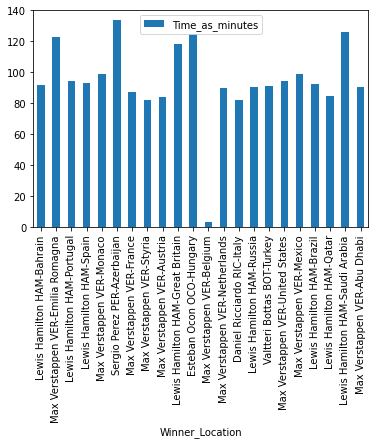

In [12]:
figsize=(13,9)
df.plot.bar(x="Winner_Location", y="Time_as_minutes")

In [13]:
#Order the winner by time spending
ordered_time_df = df.sort_values(by = 'Time_as_minutes', ascending=False)
ordered_time_df 

,Grand Prix,Date,Winner,Car,Laps,Time,Time_as_minutes,Winner_Location
5,Azerbaijan,06 Jun 2021,Sergio Perez PER,Red Bull Racing Honda,51,2:13:36.410,133.61,Sergio Perez PER-Azerbaijan
20,Saudi Arabia,05 Dec 2021,Lewis Hamilton HAM,Mercedes,50,2:06:15.118,126.25,Lewis Hamilton HAM-Saudi Arabia
10,Hungary,01 Aug 2021,Esteban Ocon OCO,Alpine Renault,70,2:04:43.199,124.72,Esteban Ocon OCO-Hungary
1,Emilia Romagna,18 Apr 2021,Max Verstappen VER,Red Bull Racing Honda,63,2:02:34.598,122.58,Max Verstappen VER-Emilia Romagna
9,Great Britain,18 Jul 2021,Lewis Hamilton HAM,Mercedes,52,1:58:23.284,118.39,Lewis Hamilton HAM-Great Britain
4,Monaco,23 May 2021,Max Verstappen VER,Red Bull Racing Honda,78,1:38:56.820,98.95,Max Verstappen VER-Monaco
17,Mexico,07 Nov 2021,Max Verstappen VER,Red Bull Racing Honda,71,1:38:39.086,98.65,Max Verstappen VER-Mexico
16,United States,24 Oct 2021,Max Verstappen VER,Red Bull Racing Honda,56,1:34:36.552,94.61,Max Verstappen VER-United States
2,Portugal,02 May 2021,Lewis Hamilton HAM,Mercedes,66,1:34:31.421,94.52,Lewis Hamilton HAM-Portugal
3,Spain,09 May 2021,Lewis Hamilton HAM,Mercedes,66,1:33:07.680,93.13,Lewis Hamilton HAM-Spain


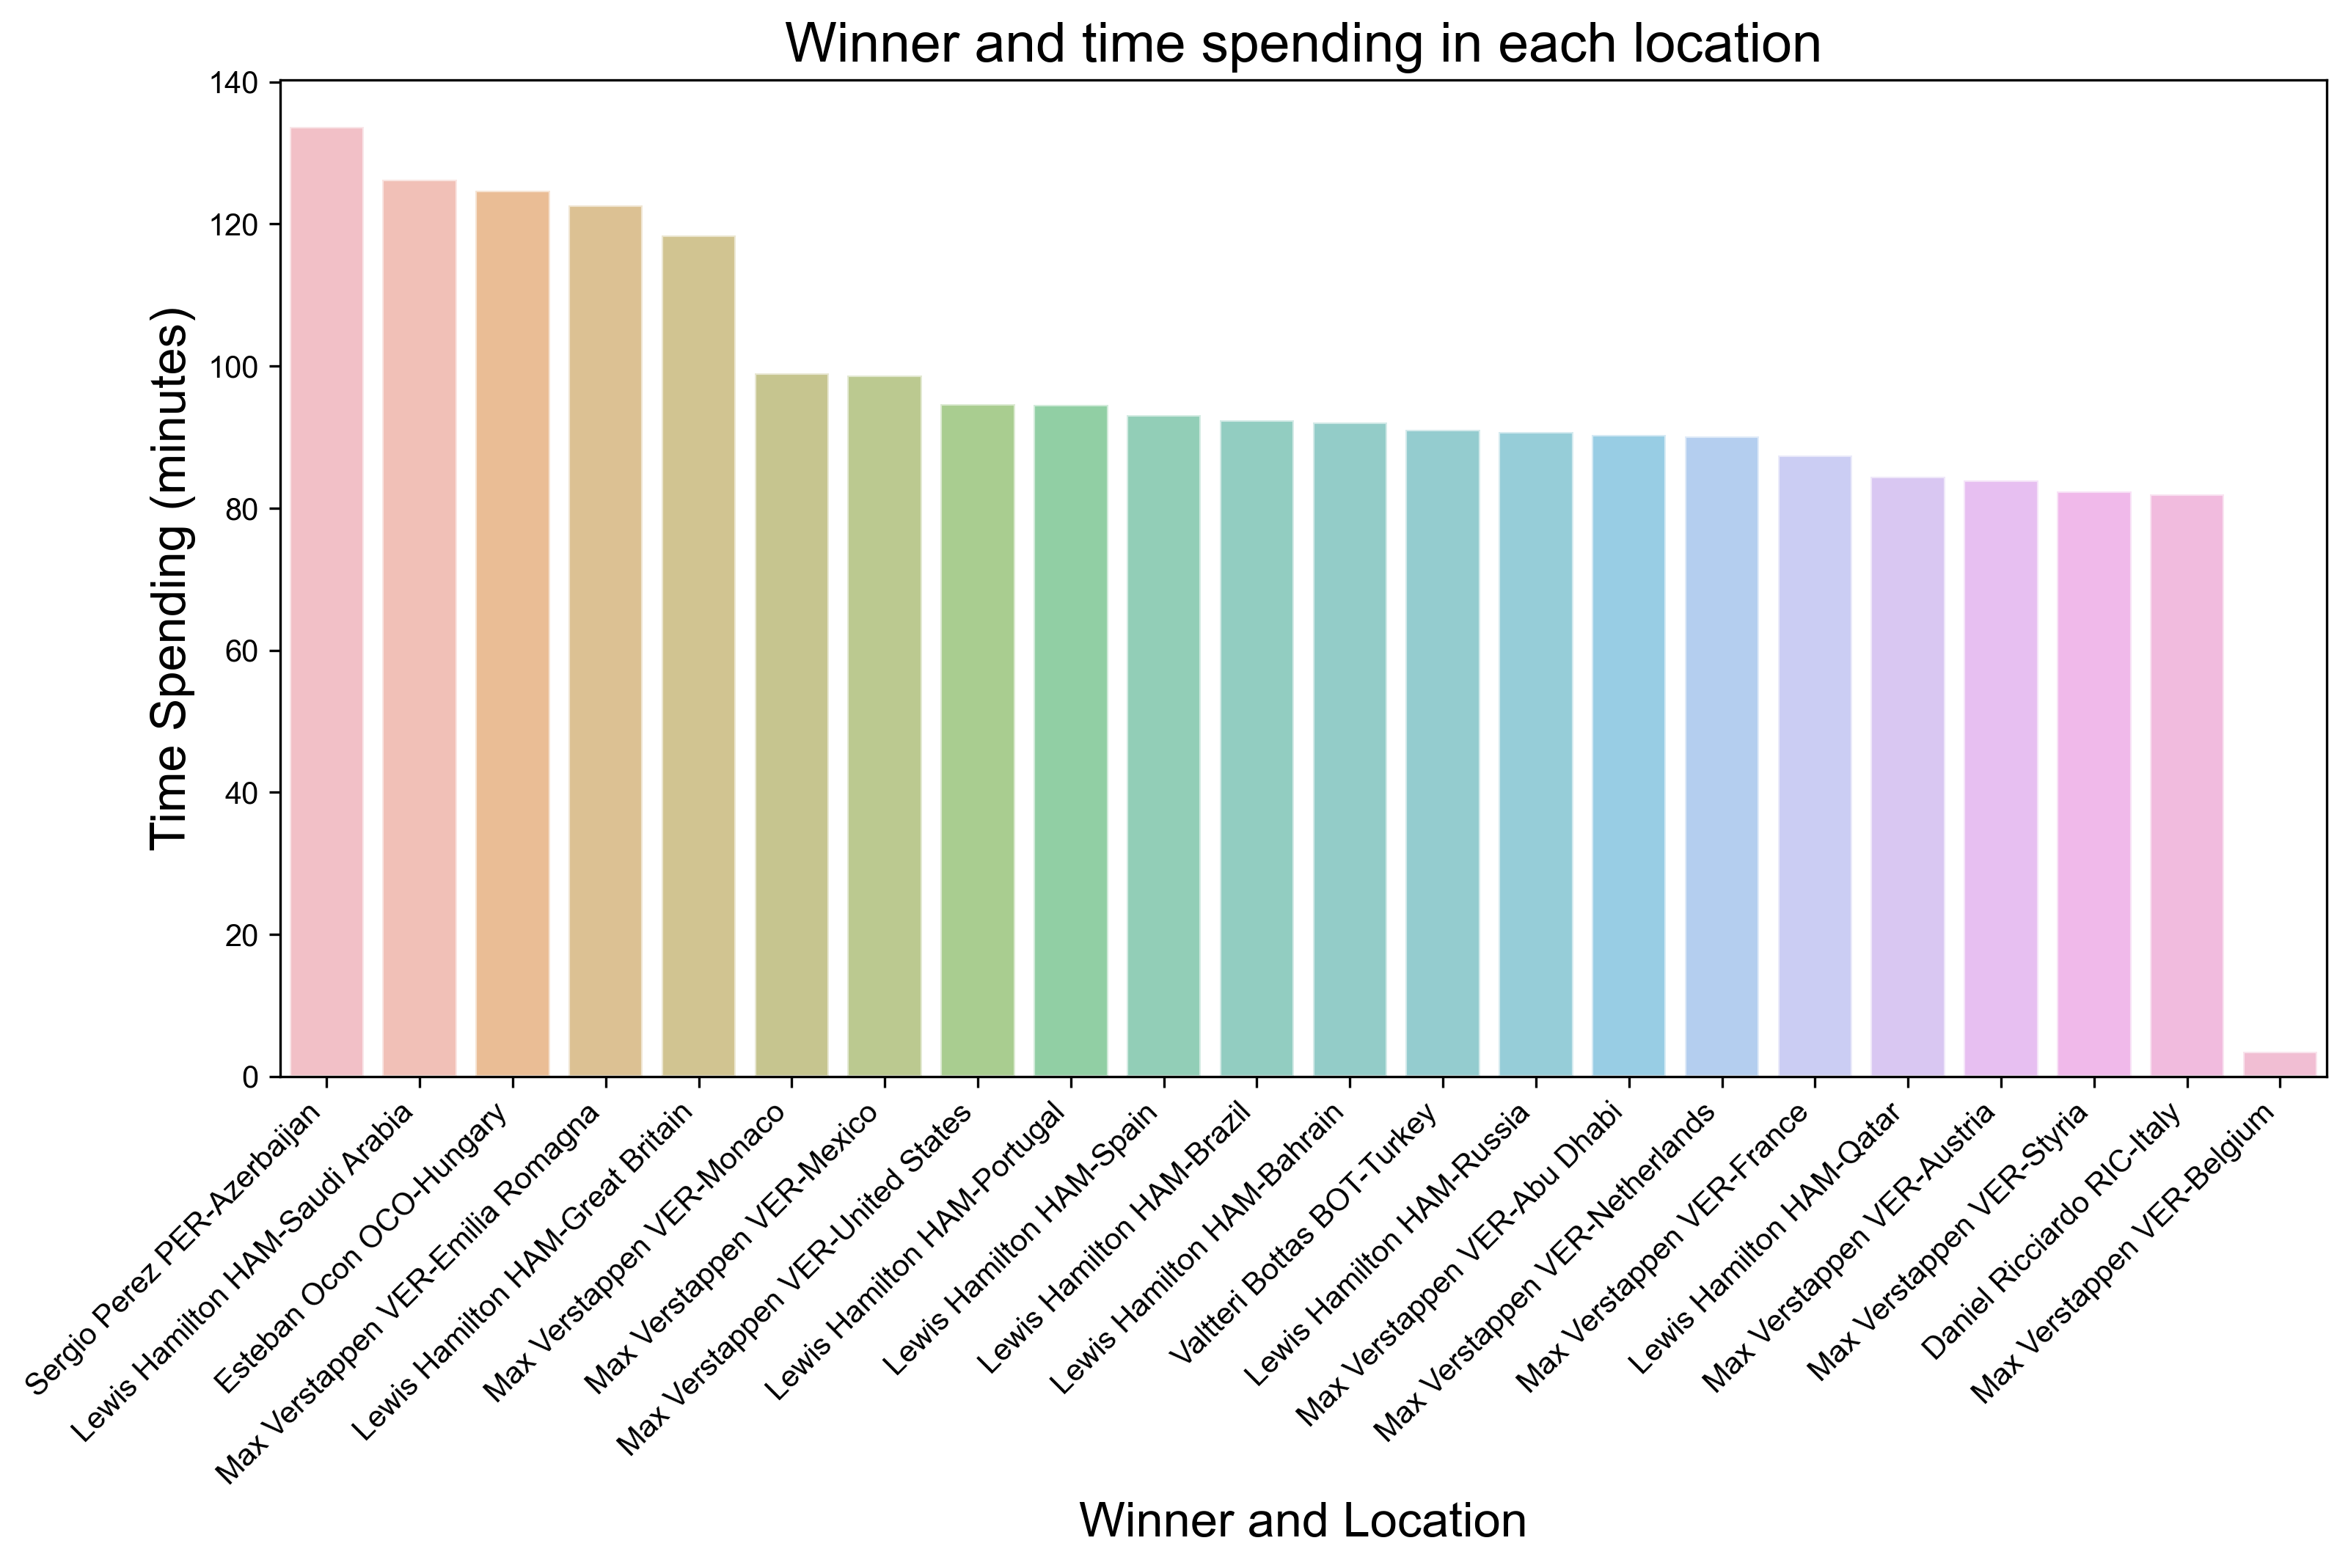

In [14]:
fig,_=plt.subplots(dpi=300,figsize=(12,6))
sns.set_style('darkgrid')
ax = sns.barplot(x=ordered_time_df["Winner_Location"], y=ordered_time_df["Time_as_minutes"], alpha=0.6)

_ = ax.set_xticklabels(ordered_time_df["Winner_Location"], rotation=45, ha="right",fontsize=10)

plt.xlabel('Winner and Location',fontsize=16)
plt.ylabel('Time Spending (minutes)',fontsize=16)
ax.set_title('Winner and time spending in each location',fontsize=18)

plt.savefig('Fig 1 Winner and time.png')

## 2.Get all the URLs for 22 races of year 2021.

In [15]:
all_urls = soup.find_all('a')
all_urls

[<a class="skip" href="#globalNav" tabindex="1">Skip to Global Nav</a>,
 <a class="skip" href="#primaryNav" tabindex="2">Skip to Primary content</a>,
 <a class="skip" href="#main" tabindex="3">Skip to main content</a>,
 <a href="/en.html">
 <span><img alt="Formula 1" src="/etc/designs/fom-website/images/f1_logo.svg"/></span>
 </a>,
 <a class="signin login-link icon icon-user" data-locationinpage="navigation" data-pathtype="internal" href="#"><span class="text-hide">Login/Register</span></a>,
 <a class="user-action icon icon-user" data-locationinpage="navigation" data-pathtype="internal" data-target="#userLoggedInOverlay" data-toggle="modal" href="#"><span class="text-hide">User Options</span></a>,
 <a href="/en.html">
 <span><img alt="Formula 1" src="/etc/designs/fom-website/images/f1_logo.svg"/></span>
 </a>,
 <a class="nav-mainlink" data-locationinpage="navigation" data-pathtype="internal" href="/en/latest.html">
 <span class="link-text">Latest</span>
 </a>,
 <a class="f1-bold--s f1-

In [16]:
# Extract the url from webpage
race_urls = []
for url in all_urls:
    if ('2021' in str(url.get('href'))) and ('race-result' in str(url.get('href'))) and (url.get('href') not in race_urls):
            race_urls.append(url.get('href'))
race_urls = ['https://www.formula1.com' + x for x in race_urls]
race_urls

['https://www.formula1.com/en/results.html/2021/races/1064/bahrain/race-result.html',
 'https://www.formula1.com/en/results.html/2021/races/1065/italy/race-result.html',
 'https://www.formula1.com/en/results.html/2021/races/1066/portugal/race-result.html',
 'https://www.formula1.com/en/results.html/2021/races/1086/spain/race-result.html',
 'https://www.formula1.com/en/results.html/2021/races/1067/monaco/race-result.html',
 'https://www.formula1.com/en/results.html/2021/races/1068/azerbaijan/race-result.html',
 'https://www.formula1.com/en/results.html/2021/races/1070/france/race-result.html',
 'https://www.formula1.com/en/results.html/2021/races/1092/austria/race-result.html',
 'https://www.formula1.com/en/results.html/2021/races/1071/austria/race-result.html',
 'https://www.formula1.com/en/results.html/2021/races/1072/great-britain/race-result.html',
 'https://www.formula1.com/en/results.html/2021/races/1073/hungary/race-result.html',
 'https://www.formula1.com/en/results.html/2021/ra

In [17]:
df['URLs'] = race_urls
df['URLs']

0     https://www.formula1.com/en/results.html/2021/...
1     https://www.formula1.com/en/results.html/2021/...
2     https://www.formula1.com/en/results.html/2021/...
3     https://www.formula1.com/en/results.html/2021/...
4     https://www.formula1.com/en/results.html/2021/...
5     https://www.formula1.com/en/results.html/2021/...
6     https://www.formula1.com/en/results.html/2021/...
7     https://www.formula1.com/en/results.html/2021/...
8     https://www.formula1.com/en/results.html/2021/...
9     https://www.formula1.com/en/results.html/2021/...
10    https://www.formula1.com/en/results.html/2021/...
11    https://www.formula1.com/en/results.html/2021/...
12    https://www.formula1.com/en/results.html/2021/...
13    https://www.formula1.com/en/results.html/2021/...
14    https://www.formula1.com/en/results.html/2021/...
15    https://www.formula1.com/en/results.html/2021/...
16    https://www.formula1.com/en/results.html/2021/...
17    https://www.formula1.com/en/results.html/2

In [18]:
source = urllib.request.urlopen('https://www.formula1.com/en/results.html/2021/races/1064/bahrain/race-result.html').read()
soup = bs.BeautifulSoup(source,'lxml')
table = soup.find_all('table')[0]   
df_race_bahrain = pd.read_html(str(table), flavor='bs4', header=[0])[0]
df_race_bahrain.drop(["Unnamed: 0","Unnamed: 8"],axis=1, inplace=True)
df_race_bahrain.head()

,Pos,No,Driver,Car,Laps,Time/Retired,PTS
0,1,44,Lewis Hamilton HAM,Mercedes,56,1:32:03.897,25
1,2,33,Max Verstappen VER,Red Bull Racing Honda,56,+0.745s,18
2,3,77,Valtteri Bottas BOT,Mercedes,56,+37.383s,16
3,4,4,Lando Norris NOR,McLaren Mercedes,56,+46.466s,12
4,5,11,Sergio Perez PER,Red Bull Racing Honda,56,+52.047s,10


In [19]:
source = urllib.request.urlopen('https://www.formula1.com/en/results.html/2021/races/1065/italy/race-result.html').read()
soup = bs.BeautifulSoup(source,'lxml')
table = soup.find_all('table')[0]   
df_race_italy = pd.read_html(str(table), flavor='bs4', header=[0])[0]
df_race_italy.drop(["Unnamed: 0","Unnamed: 8"],axis=1, inplace=True)
df_race_italy.head()

,Pos,No,Driver,Car,Laps,Time/Retired,PTS
0,1,33,Max Verstappen VER,Red Bull Racing Honda,63,2:02:34.598,25
1,2,44,Lewis Hamilton HAM,Mercedes,63,+22.000s,19
2,3,4,Lando Norris NOR,McLaren Mercedes,63,+23.702s,15
3,4,16,Charles Leclerc LEC,Ferrari,63,+25.579s,12
4,5,55,Carlos Sainz SAI,Ferrari,63,+27.036s,10


In [20]:
source = urllib.request.urlopen('https://www.formula1.com/en/results.html/2021/races/1066/portugal/race-result.html').read()
soup = bs.BeautifulSoup(source,'lxml')
table = soup.find_all('table')[0]   
df_race_portugal= pd.read_html(str(table), flavor='bs4', header=[0])[0]
df_race_portugal.drop(["Unnamed: 0","Unnamed: 8"],axis=1, inplace=True)
df_race_portugal.head()

,Pos,No,Driver,Car,Laps,Time/Retired,PTS
0,1,44,Lewis Hamilton HAM,Mercedes,66,1:34:31.421,25
1,2,33,Max Verstappen VER,Red Bull Racing Honda,66,+29.148s,18
2,3,77,Valtteri Bottas BOT,Mercedes,66,+33.530s,16
3,4,11,Sergio Perez PER,Red Bull Racing Honda,66,+39.735s,12
4,5,4,Lando Norris NOR,McLaren Mercedes,66,+51.369s,10


In [21]:
df1 = df[['Grand Prix','URLs','Date','Winner','Car','Time']]
df1

,Grand Prix,URLs,Date,Winner,Car,Time
0,Bahrain,https://www.formula1.com/en/results.html/2021/...,28 Mar 2021,Lewis Hamilton HAM,Mercedes,1:32:03.897
1,Emilia Romagna,https://www.formula1.com/en/results.html/2021/...,18 Apr 2021,Max Verstappen VER,Red Bull Racing Honda,2:02:34.598
2,Portugal,https://www.formula1.com/en/results.html/2021/...,02 May 2021,Lewis Hamilton HAM,Mercedes,1:34:31.421
3,Spain,https://www.formula1.com/en/results.html/2021/...,09 May 2021,Lewis Hamilton HAM,Mercedes,1:33:07.680
4,Monaco,https://www.formula1.com/en/results.html/2021/...,23 May 2021,Max Verstappen VER,Red Bull Racing Honda,1:38:56.820
5,Azerbaijan,https://www.formula1.com/en/results.html/2021/...,06 Jun 2021,Sergio Perez PER,Red Bull Racing Honda,2:13:36.410
6,France,https://www.formula1.com/en/results.html/2021/...,20 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,1:27:25.770
7,Styria,https://www.formula1.com/en/results.html/2021/...,27 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,1:22:18.925
8,Austria,https://www.formula1.com/en/results.html/2021/...,04 Jul 2021,Max Verstappen VER,Red Bull Racing Honda,1:23:54.543
9,Great Britain,https://www.formula1.com/en/results.html/2021/...,18 Jul 2021,Lewis Hamilton HAM,Mercedes,1:58:23.284


## 3. Average speed for each drivers in 22 races

In [22]:
#Replace race result web with fastest laps.
fastest = []
for url in all_urls:
    fastest = [item.replace('race-result.html','fastest-laps.html') for item in race_urls]
#reference:https://appdividend.com/2022/03/15/python-list-replace/#:~:text=Python%20list%20replace%3A%20How%20to%20replace%20string%2C%20integer,...%203%20Replace%20integer%20in%20Python%20List.%20
fastest

['https://www.formula1.com/en/results.html/2021/races/1064/bahrain/fastest-laps.html',
 'https://www.formula1.com/en/results.html/2021/races/1065/italy/fastest-laps.html',
 'https://www.formula1.com/en/results.html/2021/races/1066/portugal/fastest-laps.html',
 'https://www.formula1.com/en/results.html/2021/races/1086/spain/fastest-laps.html',
 'https://www.formula1.com/en/results.html/2021/races/1067/monaco/fastest-laps.html',
 'https://www.formula1.com/en/results.html/2021/races/1068/azerbaijan/fastest-laps.html',
 'https://www.formula1.com/en/results.html/2021/races/1070/france/fastest-laps.html',
 'https://www.formula1.com/en/results.html/2021/races/1092/austria/fastest-laps.html',
 'https://www.formula1.com/en/results.html/2021/races/1071/austria/fastest-laps.html',
 'https://www.formula1.com/en/results.html/2021/races/1072/great-britain/fastest-laps.html',
 'https://www.formula1.com/en/results.html/2021/races/1073/hungary/fastest-laps.html',
 'https://www.formula1.com/en/results.h

In [23]:
len(fastest)

22

In [24]:
#Get fastest laps information.
fastest_laps = []
for url in fastest:
    source = urllib.request.urlopen(url)
    soup = bs.BeautifulSoup(source,'lxml')
    table = soup.find_all('table')[0] 
    df2 = pd.read_html(str(table), flavor='bs4', header=[0])[0]
    
    fastest_laps.append(df2)
    
print(fastest_laps)

[    Unnamed: 0  Pos  No                  Driver                        Car  \
0          NaN    1  77     Valtteri Bottas BOT                   Mercedes   
1          NaN    2  33      Max Verstappen VER      Red Bull Racing Honda   
2          NaN    3  11        Sergio Perez PER      Red Bull Racing Honda   
3          NaN    4  44      Lewis Hamilton HAM                   Mercedes   
4          NaN    5  10        Pierre Gasly GAS           AlphaTauri Honda   
5          NaN    6   4        Lando Norris NOR           McLaren Mercedes   
6          NaN    7  55        Carlos Sainz SAI                    Ferrari   
7          NaN    8  22        Yuki Tsunoda TSU           AlphaTauri Honda   
8          NaN    9  18        Lance Stroll STR      Aston Martin Mercedes   
9          NaN   10   3    Daniel Ricciardo RIC           McLaren Mercedes   
10         NaN   11  16     Charles Leclerc LEC                    Ferrari   
11         NaN   12  63      George Russell RUS          Willia

In [25]:
fastest_1 = [fastest_laps[0][['Driver','Avg Speed']],fastest_laps[1][['Driver','Avg Speed']],fastest_laps[2][['Driver','Avg Speed']],
             fastest_laps[3][['Driver','Avg Speed']],fastest_laps[4][['Driver','Avg Speed']],fastest_laps[5][['Driver','Avg Speed']],
             fastest_laps[6][['Driver','Avg Speed']],fastest_laps[7][['Driver','Avg Speed']],fastest_laps[8][['Driver','Avg Speed']],
             fastest_laps[9][['Driver','Avg Speed']],fastest_laps[10][['Driver','Avg Speed']],fastest_laps[11][['Driver']],
             fastest_laps[12][['Driver','Avg Speed']],fastest_laps[13][['Driver','Avg Speed']],fastest_laps[14][['Driver','Avg Speed']],
             fastest_laps[15][['Driver','Avg Speed']],fastest_laps[16][['Driver','Avg Speed']],fastest_laps[17][['Driver','Avg Speed']],
             fastest_laps[18][['Driver','Avg Speed']],fastest_laps[19][['Driver','Avg Speed']],fastest_laps[20][['Driver','Avg Speed']],
             fastest_laps[21][['Driver','Avg Speed']]]
fastest_1

[                    Driver  Avg Speed
 0      Valtteri Bottas BOT    211.566
 1       Max Verstappen VER    208.984
 2         Sergio Perez PER    207.334
 3       Lewis Hamilton HAM    207.235
 4         Pierre Gasly GAS    207.069
 5         Lando Norris NOR    206.398
 6         Carlos Sainz SAI    206.151
 7         Yuki Tsunoda TSU    205.603
 8         Lance Stroll STR    205.378
 9     Daniel Ricciardo RIC    205.233
 10     Charles Leclerc LEC    205.112
 11      George Russell RUS    205.008
 12  Antonio Giovinazzi GIO    204.823
 13      Kimi Räikkönen RAI    204.672
 14        Esteban Ocon OCO    204.548
 15    Sebastian Vettel VET    203.871
 16     Fernando Alonso ALO    202.816
 17     Mick Schumacher MSC    202.667
 18     Nicholas Latifi LAT    201.685,
                     Driver  Avg Speed
 0       Lewis Hamilton HAM    230.403
 1       Max Verstappen VER    227.960
 2         Lando Norris NOR    225.819
 3         Sergio Perez PER    225.603
 4         Yuki Tsunoda 

In [26]:
df_merged_1 = reduce(lambda left,right: pd.merge(left,right,on=['Driver'],how='outer'),fastest_1)
df_merged_1
#refrence:https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

,Driver,Avg Speed_x,Avg Speed_y,Avg Speed_x,Avg Speed_y,Avg Speed_x,Avg Speed_y,Avg Speed_x,Avg Speed_y,Avg Speed_x,...,Avg Speed_y,Avg Speed_x,Avg Speed_y,Avg Speed_x,Avg Speed_y,Avg Speed_x,Avg Speed_y,Avg Speed_x,Avg Speed_y,Avg Speed
0,Valtteri Bottas BOT,211.566,199.721,209.738,211.884,158.682,204.521,216.905,226.537,227.349,...,211.338,245.850,214.352,212.500,198.176,199.223,213.887,221.992,243.155,218.871
1,Max Verstappen VER,208.984,227.960,207.581,215.357,160.929,206.839,218.156,228.542,234.815,...,209.244,244.852,213.959,207.169,200.278,196.134,214.005,232.799,242.943,220.800
2,Sergio Perez PER,207.334,225.603,207.715,211.743,161.138,206.432,217.504,228.956,227.956,...,208.714,244.901,212.193,207.841,199.333,194.976,218.453,226.227,236.104,219.993
3,Lewis Hamilton HAM,207.235,230.403,206.971,208.640,164.769,206.270,215.903,231.811,228.177,...,215.654,242.864,215.760,207.160,201.521,194.116,215.503,227.633,244.962,219.495
4,Pierre Gasly GAS,207.069,224.320,204.243,206.820,159.300,205.386,214.378,NaN,228.110,...,204.929,234.310,214.214,207.046,194.547,192.453,211.839,222.572,240.813,217.668
5,Lando Norris NOR,206.398,225.819,205.038,207.064,160.883,205.180,215.870,225.604,227.027,...,206.535,245.434,216.096,207.870,198.016,192.197,210.306,225.876,241.817,219.123
6,Carlos Sainz SAI,206.151,225.154,203.471,206.330,160.989,204.454,212.584,226.570,229.402,...,203.725,243.747,212.024,209.057,197.722,193.484,213.346,223.726,241.983,216.982
7,Yuki Tsunoda TSU,205.603,225.548,204.133,198.408,162.259,205.936,212.479,223.184,227.080,...,202.319,NaN,210.612,206.979,196.209,NaN,209.050,222.510,240.269,217.285
8,Lance Stroll STR,205.378,223.718,204.352,203.735,160.875,203.478,214.981,222.746,226.405,...,202.780,242.912,209.555,207.506,196.135,191.454,205.887,221.713,239.498,214.657
9,Daniel Ricciardo RIC,205.233,222.739,204.310,205.612,161.082,204.428,213.896,224.295,225.876,...,204.650,245.894,212.388,206.067,197.785,191.126,208.379,222.115,239.725,214.280


In [27]:
mean_speed = []
mean_speed = df_merged_1.mean(axis=1)#Get average speed by each row
df_merged_1['mean_speed'] = mean_speed
df_merged_1[['Driver','mean_speed']]

,Driver,mean_speed
0,Valtteri Bottas BOT,214.026100
1,Max Verstappen VER,214.309450
2,Sergio Perez PER,215.121650
3,Lewis Hamilton HAM,215.316190
4,Pierre Gasly GAS,211.307250
5,Lando Norris NOR,213.706600
6,Carlos Sainz SAI,212.241905
7,Yuki Tsunoda TSU,210.244526
8,Lance Stroll STR,211.415100
9,Daniel Ricciardo RIC,211.079905


In [28]:
ordered_df_merged_1 = df_merged_1[['Driver','mean_speed']].sort_values(by = 'mean_speed', ascending=False)
ordered_df_merged_1

,Driver,mean_speed
20,Robert Kubica KUB,223.079000
10,Charles Leclerc LEC,216.208421
3,Lewis Hamilton HAM,215.316190
2,Sergio Perez PER,215.121650
1,Max Verstappen VER,214.309450
0,Valtteri Bottas BOT,214.026100
5,Lando Norris NOR,213.706600
6,Carlos Sainz SAI,212.241905
16,Fernando Alonso ALO,211.906667
8,Lance Stroll STR,211.415100


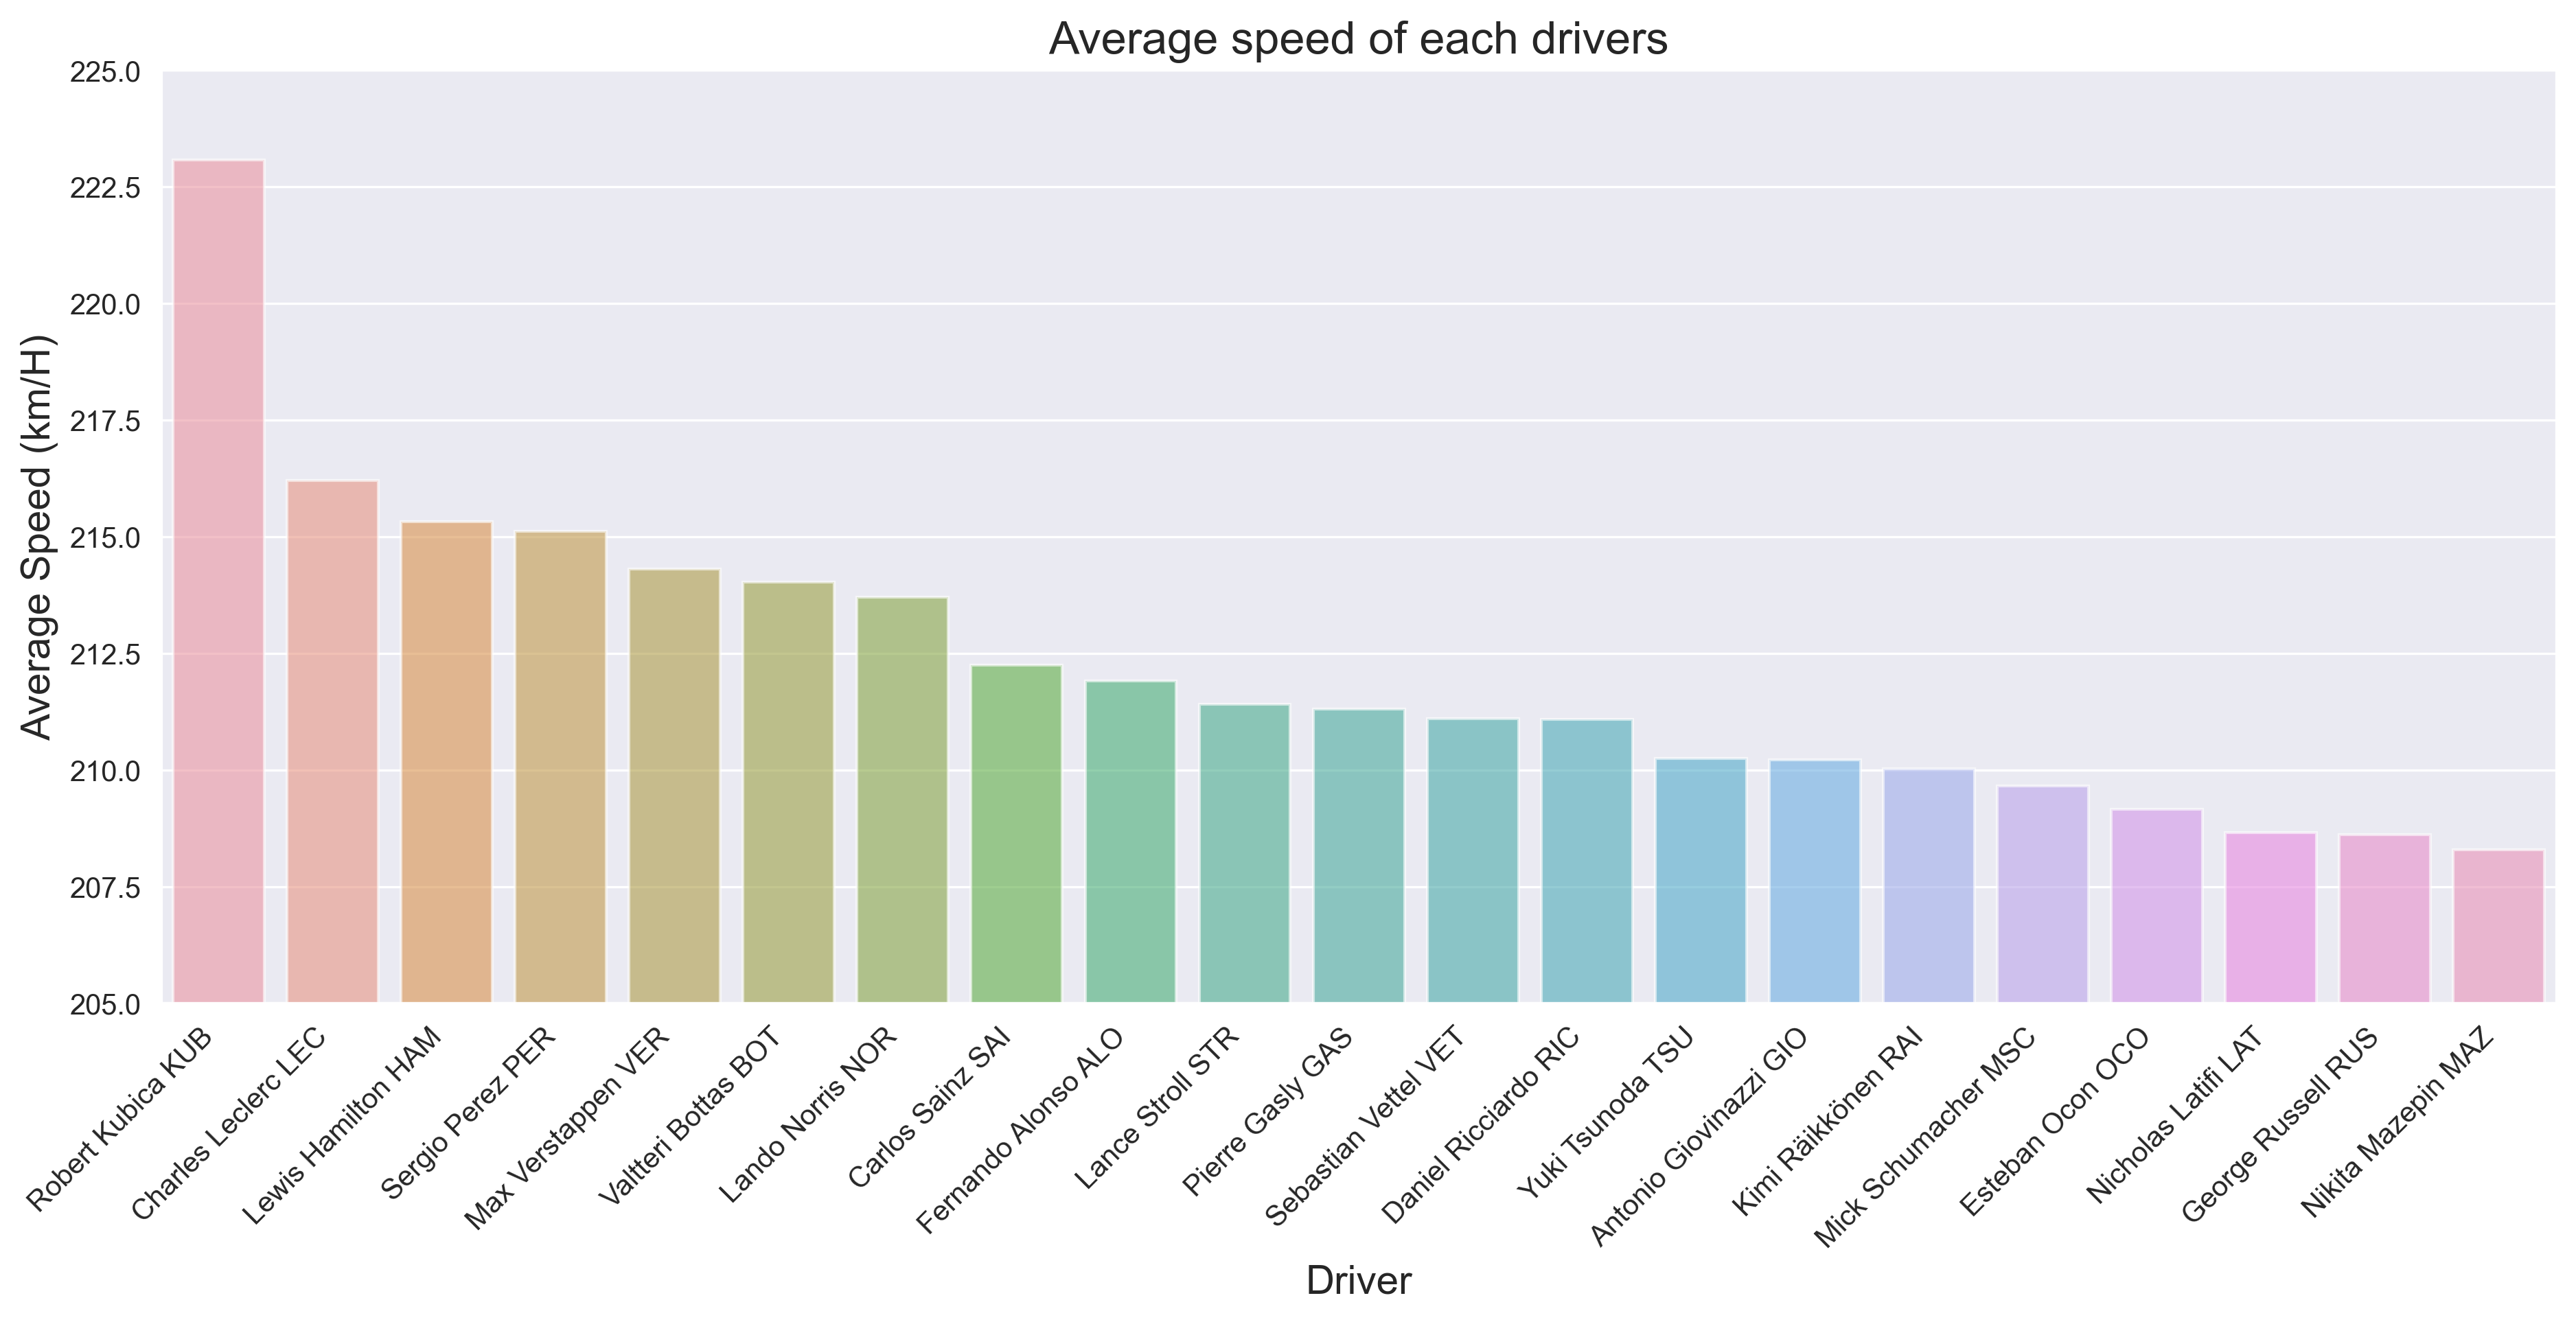

In [29]:
fig,_=plt.subplots(dpi=300,figsize=(15,6))
sns.set_style('darkgrid')
ax = sns.barplot(x=ordered_df_merged_1['Driver'], y=ordered_df_merged_1["mean_speed"], alpha=0.6)

_ = ax.set_xticklabels(ordered_df_merged_1['Driver'], rotation=45, ha="right",fontsize=10)
ax.set_ylim(205,225)

plt.xlabel('Driver', fontsize=14)
plt.ylabel('Average Speed (km/H)', fontsize=14)

ax.set_title('Average speed of each drivers',fontsize=16)

plt.savefig("Fig 2 Driver's average speed.png")

## Subtask4

In [30]:
df_results = pd.read_csv('season_results2021.csv')
df_results

,Driver,Car,bahrain,italy,portugal,spain,monaco,azerbaijan,france,austria,...,netherlands,italy_1,russia,turkey,united-states,mexico,brazil,qatar,saudi-arabia,abu-dhabi
0,Daniel Ricciardo RIC,MCL,6.0,8.0,2.0,8.0,0.0,2.0,8.0,0.0,...,0.0,26.0,12.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0
1,Lando Norris NOR,MCL,12.0,15.0,10.0,4.0,15.0,10.0,10.0,10.0,...,1.0,18.0,7.0,6.0,4.0,1.0,1.0,2.0,1.0,6.0
2,Sebastian Vettel VET,AST,0.0,0.0,0.0,0.0,10.0,18.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0,0.0,0.0
3,Nicholas Latifi LAT,WIL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kimi Räikkönen RAI,ALF,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
5,Nikita Mazepin MAZ,HAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Pierre Gasly GAS,ALP,0.0,6.0,1.0,1.0,8.0,15.0,6.0,0.0,...,12.0,0.0,0.0,8.0,0.0,12.0,6.0,0.0,8.0,10.0
7,Sergio Perez PER,RED,10.0,0.0,12.0,10.0,12.0,25.0,15.0,12.0,...,4.0,10.0,2.0,15.0,15.0,15.0,13.0,12.0,0.0,0.0
8,Fernando Alonso ALO,ALP,0.0,1.0,4.0,0.0,0.0,8.0,4.0,2.0,...,8.0,4.0,8.0,0.0,0.0,2.0,2.0,15.0,0.0,4.0
9,Charles Leclerc LEC,FER,8.0,12.0,8.0,12.0,0.0,12.0,0.0,6.0,...,10.0,12.0,0.0,12.0,12.0,10.0,10.0,4.0,6.0,1.0


In [31]:
#Data type
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Driver         21 non-null     object 
 1   Car            21 non-null     object 
 2   bahrain        21 non-null     float64
 3   italy          21 non-null     float64
 4   portugal       21 non-null     float64
 5   spain          21 non-null     float64
 6   monaco         21 non-null     float64
 7   azerbaijan     21 non-null     float64
 8   france         21 non-null     float64
 9   austria        21 non-null     float64
 10  austria_1      21 non-null     float64
 11  great-britain  21 non-null     float64
 12  hungary        21 non-null     float64
 13  belgium        21 non-null     float64
 14  netherlands    21 non-null     float64
 15  italy_1        21 non-null     float64
 16  russia         21 non-null     float64
 17  turkey         21 non-null     float64
 18  united-state

In [32]:
#Missing Values
print(df_results.isnull().sum())

Driver           0
Car              0
bahrain          0
italy            0
portugal         0
spain            0
monaco           0
azerbaijan       0
france           0
austria          0
austria_1        0
great-britain    0
hungary          0
belgium          0
netherlands      0
italy_1          0
russia           0
turkey           0
united-states    0
mexico           0
brazil           0
qatar            0
saudi-arabia     0
abu-dhabi        0
dtype: int64


In [33]:
df_results.columns[2:]

Index(['bahrain', 'italy', 'portugal', 'spain', 'monaco', 'azerbaijan',
       'france', 'austria', 'austria_1', 'great-britain', 'hungary', 'belgium',
       'netherlands', 'italy_1', 'russia', 'turkey', 'united-states', 'mexico',
       'brazil', 'qatar', 'saudi-arabia', 'abu-dhabi'],
      dtype='object')

In [34]:
drivers_count = {}

for i in range(len(df_results)):
    count = 0
    while count < (len(df_results.iloc[i])):
        if count == 0:
            x = df_results.iloc[i][count]
            drivers_count[x] = []
        elif count == 1:
            pass
        elif count == 2:
            drivers_count[x].append(df_results.iloc[i][count])
        else:
            drivers_count[x].append(sum(df_results.iloc[i][list(range(2,count+1))]))
        count = count + 1
        
drivers_count

{'Daniel Ricciardo RIC': [6.0,
  14.0,
  16.0,
  24.0,
  24.0,
  26.0,
  34.0,
  34.0,
  40.0,
  50.0,
  50.0,
  56.0,
  56.0,
  82.0,
  94.0,
  94.0,
  104.0,
  104.0,
  104.0,
  104.0,
  114.0,
  114.0],
 'Lando Norris NOR': [12.0,
  27.0,
  37.0,
  41.0,
  56.0,
  66.0,
  76.0,
  86.0,
  101.0,
  113.0,
  113.0,
  113.0,
  114.0,
  132.0,
  139.0,
  145.0,
  149.0,
  150.0,
  151.0,
  153.0,
  154.0,
  160.0],
 'Sebastian Vettel VET': [0.0,
  0.0,
  0.0,
  0.0,
  10.0,
  28.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  35.0,
  35.0,
  35.0,
  35.0,
  35.0,
  36.0,
  42.0,
  42.0,
  43.0,
  43.0,
  43.0],
 'Nicholas Latifi LAT': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0],
 'Kimi Räikkönen RAI': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  2.0,
  2.0,
  2.0,
  6.0,
  6.0,
  6.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0],
 'Nikita Mazepin MAZ': [0.

In [35]:
df_points = pd.DataFrame.from_dict(drivers_count,orient = 'index', columns = df_results.columns[2:])
#refrence:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html
df_points

,bahrain,italy,portugal,spain,monaco,azerbaijan,france,austria,austria_1,great-britain,...,netherlands,italy_1,russia,turkey,united-states,mexico,brazil,qatar,saudi-arabia,abu-dhabi
Daniel Ricciardo RIC,6.0,14.0,16.0,24.0,24.0,26.0,34.0,34.0,40.0,50.0,...,56.0,82.0,94.0,94.0,104.0,104.0,104.0,104.0,114.0,114.0
Lando Norris NOR,12.0,27.0,37.0,41.0,56.0,66.0,76.0,86.0,101.0,113.0,...,114.0,132.0,139.0,145.0,149.0,150.0,151.0,153.0,154.0,160.0
Sebastian Vettel VET,0.0,0.0,0.0,0.0,10.0,28.0,30.0,30.0,30.0,30.0,...,35.0,35.0,35.0,35.0,36.0,42.0,42.0,43.0,43.0,43.0
Nicholas Latifi LAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
Kimi Räikkönen RAI,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,6.0,6.0,6.0,10.0,10.0,10.0,10.0,10.0
Nikita Mazepin MAZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pierre Gasly GAS,0.0,6.0,7.0,8.0,16.0,31.0,37.0,37.0,39.0,39.0,...,66.0,66.0,66.0,74.0,74.0,86.0,92.0,92.0,100.0,110.0
Sergio Perez PER,10.0,10.0,22.0,32.0,44.0,69.0,84.0,96.0,104.0,104.0,...,108.0,118.0,120.0,135.0,150.0,165.0,178.0,190.0,190.0,190.0
Fernando Alonso ALO,0.0,1.0,5.0,5.0,5.0,13.0,17.0,19.0,20.0,26.0,...,46.0,50.0,58.0,58.0,58.0,60.0,62.0,77.0,77.0,81.0
Charles Leclerc LEC,8.0,20.0,28.0,40.0,40.0,52.0,52.0,58.0,62.0,80.0,...,92.0,104.0,104.0,116.0,128.0,138.0,148.0,152.0,158.0,159.0


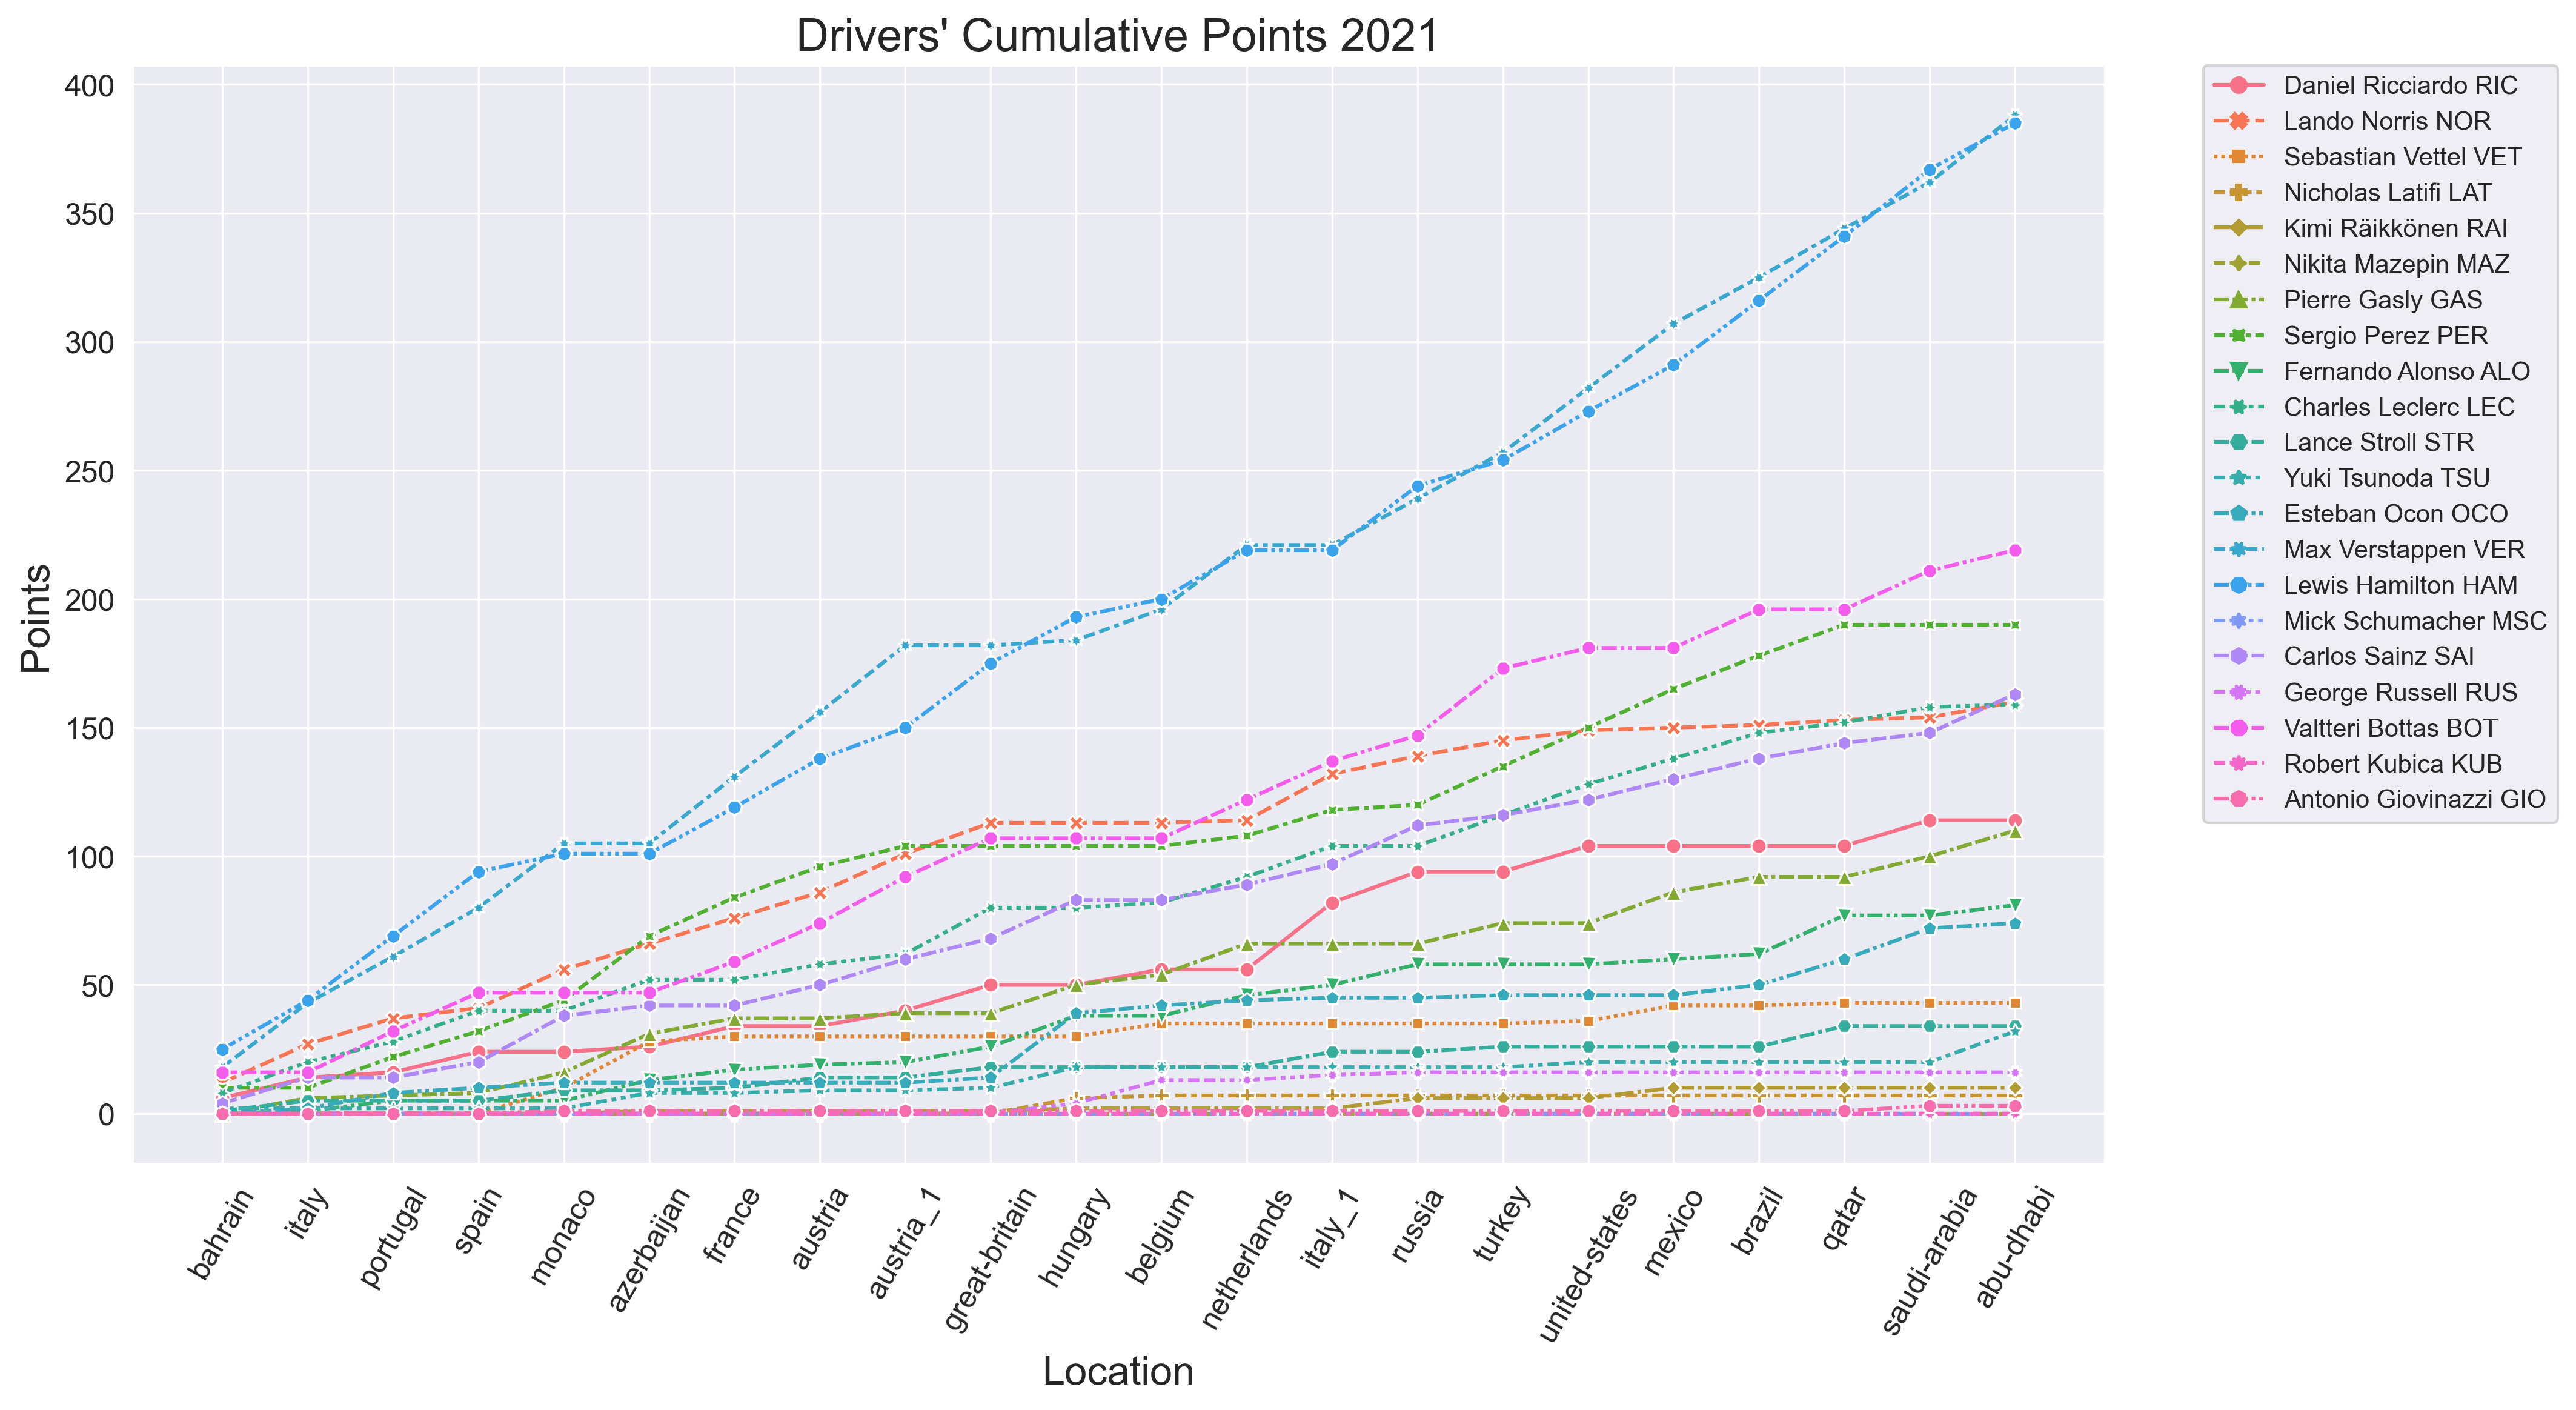

In [36]:
plt.figure(dpi=300, figsize=(14,8))
sns.set_style('darkgrid')
sns.lineplot(data=df_points.T, markers = True)

plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad=0.)

plt.xlabel('Location', fontsize=16)
plt.ylabel('Points', fontsize=16)
plt.title("Drivers' Cumulative Points 2021",fontsize=18)

plt.savefig('Fig 3 Cumulative points.png')
#refrence: https://www.statology.org/seaborn-legend-position/